# 🎯 Master Pipeline: End-to-End Data Science Project

<img src='https://miro.medium.com/max/1400/1*KzmIUYPmxgEHhXX7SlbP4w.jpeg' width='600' alt='Pipeline'>

## 🚀 Complete Data Science Workflow

**This is where everything comes together!** We'll build:
- **Complete preprocessing pipeline**
- **Feature engineering automation**
- **Model-ready transformations**
- **Production-grade code**
- **Real business case study**

### 📚 What We'll Build:
1. **Data Pipeline Architecture** - Modular design
2. **Custom Transformers** - Sklearn compatible
3. **Feature Engineering Pipeline** - Automated features
4. **Preprocessing Pipeline** - End-to-end cleaning
5. **Validation Framework** - Quality checks
6. **Model Preparation** - Ready for ML
7. **Pipeline Persistence** - Save and load
8. **Production Deployment** - API ready
9. **Monitoring & Logging** - Track everything
10. **Complete Project** - Customer churn prediction

---

## 🏗️ Let's Build Production Pipelines!

In [ ]:
# Import all required  libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Sklearn imports
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import joblib
import logging
from datetime import datetime

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)
 
print("🎯 Master   Pipeline - Ready to Build!")
print("\n💡 Building  production-ready data pipelines!")

🎯 Master  Pipeline - Ready to Build!

💡 Building  production-ready data pipelines!


---

## 📌 Section 1: Custom Transformers

### 🎯 Building Sklearn-Compatible Components

In [9]:
# 1.1 Custom Transformer Classes (FIXED VERSION)
print("🔧 CUSTOM TRANSFORMERS\n" + "="*40)

class OutlierRemover(BaseEstimator, TransformerMixin):
    """Remove outliers using IQR method - works with both DataFrames and arrays"""
    
    def __init__(self, factor=1.5):
        self.factor = factor
        self.bounds_ = {}
        self.feature_names_ = None
    
    def fit(self, X, y=None):
        # Convert to DataFrame if it's an array
        if isinstance(X, np.ndarray):
            X_df = pd.DataFrame(X)
            self.feature_names_ = list(range(X.shape[1]))
        else:
            X_df = X
            self.feature_names_ = X.columns.tolist()
        
        # Calculate bounds for each numeric column
        for i, column in enumerate(X_df.columns):
            if X_df.iloc[:, i].dtype in ['int64', 'float64', 'float32', 'int32']:
                Q1 = X_df.iloc[:, i].quantile(0.25)
                Q3 = X_df.iloc[:, i].quantile(0.75)
                IQR = Q3 - Q1
                self.bounds_[i] = (
                    Q1 - self.factor * IQR,
                    Q3 + self.factor * IQR
                )
        return self
    
    def transform(self, X):
        # Convert to DataFrame if it's an array
        if isinstance(X, np.ndarray):
            X_df = pd.DataFrame(X)
        else:
            X_df = X.copy()
        
        # Apply bounds
        for col_idx, (lower, upper) in self.bounds_.items():
            X_df.iloc[:, col_idx] = X_df.iloc[:, col_idx].clip(lower, upper)
        
        logger.info(f"Outliers capped for {len(self.bounds_)} columns")
        
        # Return in the same format as input
        if isinstance(X, np.ndarray):
            return X_df.values
        else:
            return X_df


class MissingIndicator(BaseEstimator, TransformerMixin):
    """Add binary indicators for missing values - works with arrays and DataFrames"""
    
    def __init__(self, threshold=0.1):
        self.threshold = threshold
        self.columns_ = []
        self.feature_names_ = None
    
    def fit(self, X, y=None):
        # Convert to DataFrame if it's an array
        if isinstance(X, np.ndarray):
            X_df = pd.DataFrame(X)
        else:
            X_df = X
        
        # Find columns with missing values above threshold
        missing_pct = X_df.isnull().sum() / len(X_df)
        self.columns_ = list(missing_pct[missing_pct > self.threshold].index)
        
        # Store feature names for later
        if isinstance(X, pd.DataFrame):
            self.feature_names_ = X.columns.tolist()
        else:
            self.feature_names_ = list(range(X.shape[1]))
        
        return self
    
    def transform(self, X):
        # Convert to DataFrame if it's an array
        if isinstance(X, np.ndarray):
            X_df = pd.DataFrame(X)
        else:
            X_df = X.copy()
        
        # Add missing indicators
        for col in self.columns_:
            X_df[f'missing_indicator_{col}'] = X_df.iloc[:, col].isnull().astype(int)
        
        logger.info(f"Added {len(self.columns_)} missing indicators")
        
        # Return in the same format as input
        if isinstance(X, np.ndarray):
            return X_df.values
        else:
            return X_df


class FeatureEngineer(BaseEstimator, TransformerMixin):
    """Create new features from existing ones - works with arrays and DataFrames"""
    
    def __init__(self, create_interactions=True, create_ratios=True):
        self.create_interactions = create_interactions
        self.create_ratios = create_ratios
        self.numeric_columns_ = []
        self.feature_names_ = None
    
    def fit(self, X, y=None):
        # Convert to DataFrame if needed
        if isinstance(X, np.ndarray):
            X_df = pd.DataFrame(X)
        else:
            X_df = X
            
        # Identify numeric columns
        self.numeric_columns_ = []
        for i, col in enumerate(X_df.columns):
            if X_df.iloc[:, i].dtype in [np.float64, np.float32, np.int64, np.int32]:
                self.numeric_columns_.append(i)
        
        return self
    
    def transform(self, X):
        # Convert to DataFrame
        if isinstance(X, np.ndarray):
            X_df = pd.DataFrame(X)
        else:
            X_df = X.copy()
        
        # Create polynomial features
        for col_idx in self.numeric_columns_:
            if col_idx < X_df.shape[1]:
                col_name = X_df.columns[col_idx]
                X_df[f'{col_name}_squared'] = X_df.iloc[:, col_idx] ** 2
                X_df[f'{col_name}_log'] = np.log1p(np.abs(X_df.iloc[:, col_idx]))
        
        # Create interaction features (limit to avoid explosion)
        if self.create_interactions and len(self.numeric_columns_) > 1:
            # Limit interactions to first 5 numeric columns to avoid feature explosion
            cols_for_interaction = self.numeric_columns_[:min(5, len(self.numeric_columns_))]
            for i, col1_idx in enumerate(cols_for_interaction[:-1]):
                for col2_idx in cols_for_interaction[i+1:i+2]:  # Only next column
                    if col1_idx < X_df.shape[1] and col2_idx < X_df.shape[1]:
                        col1_name = X_df.columns[col1_idx]
                        col2_name = X_df.columns[col2_idx]
                        X_df[f'{col1_name}_x_{col2_name}'] = X_df.iloc[:, col1_idx] * X_df.iloc[:, col2_idx]
        
        # Create ratio features (limit to avoid explosion)
        if self.create_ratios and len(self.numeric_columns_) > 1:
            cols_for_ratio = self.numeric_columns_[:min(3, len(self.numeric_columns_))]
            for i, col1_idx in enumerate(cols_for_ratio[:-1]):
                for col2_idx in cols_for_ratio[i+1:i+2]:  # Only next column
                    if col1_idx < X_df.shape[1] and col2_idx < X_df.shape[1]:
                        col1_name = X_df.columns[col1_idx]
                        col2_name = X_df.columns[col2_idx]
                        # Avoid division by zero
                        X_df[f'{col1_name}_div_{col2_name}'] = X_df.iloc[:, col1_idx] / (X_df.iloc[:, col2_idx] + 1e-8)
        
        logger.info(f"Created {X_df.shape[1] - X.shape[1]} new features")
        
        # Return in the same format
        if isinstance(X, np.ndarray):
            return X_df.values
        else:
            return X_df


class CategoryEncoder(BaseEstimator, TransformerMixin):
    """Smart categorical encoding based on cardinality - DataFrame only"""
    
    def __init__(self, max_onehot=10):
        self.max_onehot = max_onehot
        self.encoders_ = {}
        self.encoding_type_ = {}
        self.label_encoders_ = {}
    
    def fit(self, X, y=None):
        # This transformer expects a DataFrame
        if not isinstance(X, pd.DataFrame):
            raise ValueError("CategoryEncoder requires a pandas DataFrame")
            
        for col in X.select_dtypes(include=['object']).columns:
            n_unique = X[col].nunique()
            
            if n_unique <= 2:
                # Binary encoding
                le = LabelEncoder()
                le.fit(X[col].fillna('missing'))
                self.label_encoders_[col] = le
                self.encoding_type_[col] = 'binary'
            elif n_unique <= self.max_onehot:
                # One-hot encoding
                self.encoding_type_[col] = 'onehot'
            else:
                # Target encoding (simplified - using mean encoding)
                if y is not None:
                    # Calculate mean target for each category
                    mean_dict = {}
                    for cat in X[col].unique():
                        if pd.notna(cat):
                            mask = X[col] == cat
                            mean_dict[cat] = y[mask].mean() if mask.any() else y.mean()
                    self.encoders_[col] = mean_dict
                    self.encoding_type_[col] = 'target'
        return self
    
    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("CategoryEncoder requires a pandas DataFrame")
            
        X_copy = X.copy()
        
        for col, encoding_type in self.encoding_type_.items():
            if col not in X_copy.columns:
                continue
                
            if encoding_type == 'binary':
                X_copy[col] = self.label_encoders_[col].transform(X_copy[col].fillna('missing'))
            elif encoding_type == 'onehot':
                dummies = pd.get_dummies(X_copy[col], prefix=col, drop_first=True)
                X_copy = pd.concat([X_copy.drop(col, axis=1), dummies], axis=1)
            elif encoding_type == 'target':
                # Apply target encoding
                X_copy[col] = X_copy[col].map(self.encoders_[col]).fillna(X_copy[col].map(self.encoders_[col]).mean())
        
        logger.info(f"Encoded {len(self.encoding_type_)} categorical columns")
        return X_copy


print("✅ Custom transformers created:")
print("  • OutlierRemover")
print("  • MissingIndicator")
print("  • FeatureEngineer")
print("  • CategoryEncoder")

🔧 CUSTOM TRANSFORMERS
✅ Custom transformers created:
  • OutlierRemover
  • MissingIndicator
  • FeatureEngineer
  • CategoryEncoder


---

## 📌 Section 2: Pipeline Architecture

### 🎯 Building Modular Pipelines

In [10]:
# 2.1 Create Sample Dataset
print("📊 CREATING SAMPLE DATASET\n" + "="*40)

# Generate realistic customer churn dataset
np.random.seed(42)
n_samples = 5000

data = pd.DataFrame({
    'customer_id': range(1, n_samples + 1),
    'age': np.random.normal(45, 15, n_samples).clip(18, 80),
    'tenure_months': np.random.exponential(24, n_samples),
    'monthly_charges': np.random.gamma(2, 40, n_samples),
    'total_charges': np.random.lognormal(7, 1.5, n_samples),
    'num_services': np.random.poisson(3, n_samples),
    'contract_type': np.random.choice(['Month-to-month', 'One year', 'Two year'], n_samples, p=[0.5, 0.3, 0.2]),
    'payment_method': np.random.choice(['Electronic', 'Mailed check', 'Bank transfer', 'Credit card'], n_samples),
    'internet_service': np.random.choice(['DSL', 'Fiber optic', 'No'], n_samples, p=[0.3, 0.5, 0.2]),
    'tech_support': np.random.choice(['Yes', 'No'], n_samples, p=[0.3, 0.7]),
    'online_security': np.random.choice(['Yes', 'No'], n_samples, p=[0.4, 0.6]),
    'device_protection': np.random.choice(['Yes', 'No'], n_samples, p=[0.35, 0.65]),
    'streaming_tv': np.random.choice(['Yes', 'No'], n_samples, p=[0.45, 0.55]),
    'streaming_movies': np.random.choice(['Yes', 'No'], n_samples, p=[0.45, 0.55]),
    'satisfaction_score': np.random.uniform(1, 5, n_samples),
    'support_tickets': np.random.poisson(2, n_samples),
    'late_payments': np.random.poisson(0.5, n_samples)
})

# Add correlations and create target
data['total_charges'] = data['monthly_charges'] * data['tenure_months'] * np.random.uniform(0.8, 1.2, n_samples)

# Create churn target with logical relationships
churn_probability = (
    0.1 +  # Base probability
    0.3 * (data['contract_type'] == 'Month-to-month') +
    0.2 * (data['satisfaction_score'] < 2.5) +
    0.1 * (data['support_tickets'] > 5) +
    0.1 * (data['late_payments'] > 2) +
    0.1 * (data['tenure_months'] < 12) -
    0.2 * (data['contract_type'] == 'Two year') -
    0.1 * (data['online_security'] == 'Yes')
)

data['churn'] = (np.random.random(n_samples) < churn_probability).astype(int)

# Add missing values randomly
missing_cols = ['satisfaction_score', 'support_tickets', 'total_charges']
for col in missing_cols:
    missing_idx = np.random.choice(data.index, size=int(0.1 * len(data)), replace=False)
    data.loc[missing_idx, col] = np.nan

# Add some outliers
outlier_idx = np.random.choice(data.index, size=50, replace=False)
data.loc[outlier_idx, 'monthly_charges'] *= 5
data.loc[outlier_idx[:25], 'total_charges'] *= 10

print(f"Dataset shape: {data.shape}")
print(f"Churn rate: {data['churn'].mean()*100:.1f}%")
print(f"Missing values: {data.isnull().sum().sum()}")
print("\nFirst 5 rows:")
print(data.head())

📊 CREATING SAMPLE DATASET
Dataset shape: (5000, 18)
Churn rate: 31.0%
Missing values: 1500

First 5 rows:
   customer_id        age  tenure_months  monthly_charges  total_charges  \
0            1  52.450712       4.420973        28.998892            NaN   
1            2  42.926035       5.055371        42.243909     250.571324   
2            3  54.715328      14.820140        22.840260     282.019941   
3            4  67.845448       8.094345        49.860711     346.586247   
4            5  41.487699       6.823322        93.380864     562.060393   

   num_services   contract_type payment_method internet_service tech_support  \
0             4  Month-to-month     Electronic      Fiber optic           No   
1             2        Two year  Bank transfer              DSL           No   
2             3  Month-to-month     Electronic               No           No   
3             2        One year    Credit card      Fiber optic           No   
4             1  Month-to-month  Bank

In [11]:
data.head()

,customer_id,age,tenure_months,monthly_charges,total_charges,num_services,contract_type,payment_method,internet_service,tech_support,online_security,device_protection,streaming_tv,streaming_movies,satisfaction_score,support_tickets,late_payments,churn
0,1,52.450712,4.420973,28.998892,NaN,4,Month-to-month,Electronic,Fiber optic,No,Yes,No,Yes,Yes,NaN,2.0,0,0
1,2,42.926035,5.055371,42.243909,250.571324,2,Two year,Bank transfer,DSL,No,Yes,No,No,Yes,4.079777,3.0,0,0
2,3,54.715328,14.820140,22.840260,282.019941,3,Month-to-month,Electronic,No,No,Yes,No,Yes,No,3.974223,2.0,0,0
3,4,67.845448,8.094345,49.860711,346.586247,2,One year,Credit card,Fiber optic,No,No,No,No,No,3.819199,0.0,2,0
4,5,41.487699,6.823322,93.380864,562.060393,1,Month-to-month,Bank transfer,DSL,No,No,Yes,Yes,No,1.042771,4.0,1,1


In [12]:
# 2.2 Build Preprocessing Pipeline
print("🔧 BUILDING PREPROCESSING PIPELINE\n" + "="*40)

# Separate features and target
X = data.drop(['customer_id', 'churn'], axis=1)
y = data['churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Define column groups
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumeric features ({len(numeric_features)}): {numeric_features[:5]}...")
print(f"Categorical features ({len(categorical_features)}): {categorical_features[:5]}...")

# Create preprocessing pipelines for numeric and categorical data
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('outliers', OutlierRemover(factor=1.5)),
    ('scaler', RobustScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])

# Combine pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Create the full pipeline
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

print("\n📋 Pipeline Structure:")
print("1. Numeric Pipeline:")
print("   → Median Imputation")
print("   → Outlier Capping")
print("   → Robust Scaling")
print("\n2. Categorical Pipeline:")
print("   → Constant Imputation")
print("   → One-Hot Encoding")
print("\n3. Model:")
print("   → Random Forest Classifier")

# Fit the pipeline
print("\n⏳ Training pipeline...")
full_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = full_pipeline.predict(X_test)
y_pred_proba = full_pipeline.predict_proba(X_test)[:, 1]

# Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("\n 📊 Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.3f}")

🔧 BUILDING PREPROCESSING PIPELINE
Training set: (4000, 16)
Test set: (1000, 16)

Numeric features (8): ['age', 'tenure_months', 'monthly_charges', 'total_charges', 'num_services']...
Categorical features (8): ['contract_type', 'payment_method', 'internet_service', 'tech_support', 'online_security']...

📋 Pipeline Structure:
1. Numeric Pipeline:
   → Median Imputation
   → Outlier Capping
   → Robust Scaling

2. Categorical Pipeline:
   → Constant Imputation
   → One-Hot Encoding

3. Model:
   → Random Forest Classifier

⏳ Training pipeline...


2025-09-26 09:36:31,431 - INFO - Outliers capped for 8 columns
2025-09-26 09:36:37,636 - INFO - Outliers capped for 8 columns
2025-09-26 09:36:37,804 - INFO - Outliers capped for 8 columns



 📊 Model Performance:
Accuracy: 0.735
Precision: 0.615
Recall: 0.387
F1-Score: 0.475
ROC-AUC: 0.786


---

## 📌 Section 3: Advanced Pipeline Features

### 🎯 Feature Engineering and Selection

2025-09-26 09:43:52,763 - INFO - Created 11 domain-specific features
2025-09-26 09:43:52,801 - INFO - Created 11 domain-specific features


🚀 ADVANCED FEATURE ENGINEERING
📊 Approach 1: Feature Engineering on DataFrames
----------------------------------------
Features before engineering: 16
Features after engineering: 27
Final shape after preprocessing: (4000, 31)

📈 Training Random Forest for Feature Importance...
Test Accuracy: 0.733


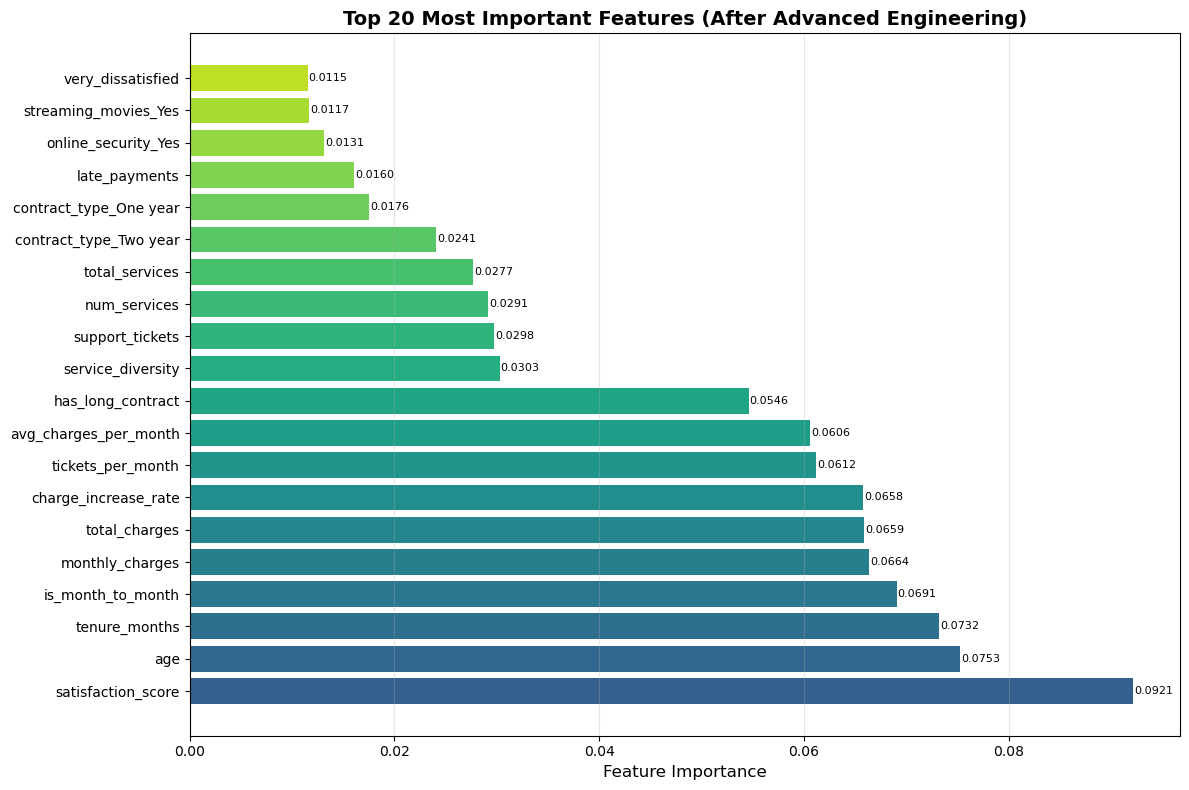


📊 Top 15 Features by Importance:
satisfaction_score                       0.0921
age                                      0.0753
tenure_months                            0.0732
is_month_to_month                        0.0691
monthly_charges                          0.0664
total_charges                            0.0659
charge_increase_rate                     0.0658
tickets_per_month                        0.0612
avg_charges_per_month                    0.0606
has_long_contract                        0.0546
service_diversity                        0.0303
support_tickets                          0.0298
num_services                             0.0291
total_services                           0.0277
contract_type_Two year                   0.0241

🎯 Approach 2: Adding Feature Selection
----------------------------------------


2025-09-26 09:43:59,172 - INFO - Selected 30 features from 31
2025-09-26 09:43:59,175 - INFO - Selected 30 features from 31


Features before selection: 31
Features after selection: 30
Test Accuracy with selected features: 0.720

📊 Top 10 Selected Features (by mutual information):
is_month_to_month                        0.0858
has_long_contract                        0.0618
contract_type_Two year                   0.0523
satisfaction_score                       0.0193
contract_type_One year                   0.0116
tenure_months                            0.0108
very_dissatisfied                        0.0100
charge_increase_rate                     0.0098
is_satisfied                             0.0096
total_services                           0.0090


In [14]:
# 3.1 Advanced Feature Engineering Pipeline (FIXED)
print("🚀 ADVANCED FEATURE ENGINEERING\n" + "="*40)

class AdvancedFeatureEngineer(BaseEstimator, TransformerMixin):
    """Advanced feature engineering with domain knowledge - works with arrays and DataFrames"""
    
    def __init__(self):
        self.original_columns = None
        self.is_dataframe = True
        
    def fit(self, X, y=None):
        # Store original column names
        if isinstance(X, pd.DataFrame):
            self.original_columns = X.columns.tolist()
            self.is_dataframe = True
        else:
            # For numpy arrays, we need to know what columns we're working with
            # This assumes the columns from the original data are preserved in order
            self.is_dataframe = False
            self.original_columns = None
        return self
    
    def transform(self, X):
        # Convert to DataFrame if it's a numpy array
        if isinstance(X, np.ndarray):
            # We can't do domain-specific engineering on arrays without column names
            # So we'll just pass through the array unchanged
            logger.info("AdvancedFeatureEngineer: Passing through array unchanged (needs DataFrame for domain features)")
            return X
        
        X_copy = X.copy()
        
        # Domain-specific features for telecom churn
        if 'monthly_charges' in X.columns and 'tenure_months' in X.columns and 'total_charges' in X.columns:
            X_copy['avg_charges_per_month'] = X_copy['total_charges'] / (X_copy['tenure_months'] + 1)
            X_copy['charge_increase_rate'] = (X_copy['monthly_charges'] - X_copy['avg_charges_per_month']) / (X_copy['avg_charges_per_month'] + 1)
        
        if 'num_services' in X.columns:
            max_services = X_copy['num_services'].max()
            if max_services > 0:
                X_copy['service_diversity'] = X_copy['num_services'] / max_services
        
        if 'support_tickets' in X.columns and 'tenure_months' in X.columns:
            X_copy['tickets_per_month'] = X_copy['support_tickets'] / (X_copy['tenure_months'] + 1)
        
        if 'satisfaction_score' in X.columns:
            X_copy['is_satisfied'] = (X_copy['satisfaction_score'] >= 3.5).astype(int)
            X_copy['very_dissatisfied'] = (X_copy['satisfaction_score'] < 2).astype(int)
        
        # Contract value features
        if 'contract_type' in X.columns:
            X_copy['is_month_to_month'] = (X_copy['contract_type'] == 'Month-to-month').astype(int)
            X_copy['has_long_contract'] = (X_copy['contract_type'].isin(['One year', 'Two year'])).astype(int)
        
        # Service bundle features
        service_cols = ['internet_service', 'tech_support', 'online_security', 
                       'device_protection', 'streaming_tv', 'streaming_movies']
        available_services = [col for col in service_cols if col in X.columns]
        if available_services:
            service_sum = sum([(X_copy[col] == 'Yes').astype(int) 
                              for col in available_services 
                              if col != 'internet_service'])
            if isinstance(service_sum, pd.Series):
                X_copy['total_services'] = service_sum
        
        # Risk indicators
        if 'late_payments' in X.columns:
            X_copy['payment_risk'] = (X_copy['late_payments'] > 0).astype(int)
            X_copy['high_payment_risk'] = (X_copy['late_payments'] > 2).astype(int)
        
        logger.info(f"Created {len(X_copy.columns) - len(X.columns)} domain-specific features")
        return X_copy


class FeatureSelector(BaseEstimator, TransformerMixin):
    """Select best features based on importance - works with arrays and DataFrames"""
    
    def __init__(self, method='mutual_info', k=20):
        self.method = method
        self.k = k
        self.selected_indices_ = None
        self.scores_ = None
    
    def fit(self, X, y=None):
        if self.method == 'mutual_info':
            selector = SelectKBest(mutual_info_classif, k=min(self.k, X.shape[1]))
        else:
            selector = SelectKBest(f_classif, k=min(self.k, X.shape[1]))
        
        selector.fit(X, y)
        self.selected_indices_ = selector.get_support(indices=True)
        self.scores_ = selector.scores_
        return self
    
    def transform(self, X):
        logger.info(f"Selected {len(self.selected_indices_)} features from {X.shape[1]}")
        if isinstance(X, pd.DataFrame):
            return X.iloc[:, self.selected_indices_]
        else:
            return X[:, self.selected_indices_]


# APPROACH 1: Apply feature engineering BEFORE the pipeline (on DataFrames)
print("📊 Approach 1: Feature Engineering on DataFrames")
print("-" * 40)

# First apply advanced feature engineering on the DataFrame
feature_engineer = AdvancedFeatureEngineer()
X_train_engineered = feature_engineer.fit_transform(X_train)
X_test_engineered = feature_engineer.transform(X_test)

print(f"Features before engineering: {X_train.shape[1]}")
print(f"Features after engineering: {X_train_engineered.shape[1]}")

# Now identify column types after engineering
numeric_features_eng = X_train_engineered.select_dtypes(include=[np.number]).columns.tolist()
categorical_features_eng = X_train_engineered.select_dtypes(include=['object']).columns.tolist()

# Create preprocessing pipeline for engineered features
preprocessor_advanced = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features_eng),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(drop='first', sparse_output=False))
        ]), categorical_features_eng)
    ])

# Fit and transform
X_train_processed = preprocessor_advanced.fit_transform(X_train_engineered)
X_test_processed = preprocessor_advanced.transform(X_test_engineered)

print(f"Final shape after preprocessing: {X_train_processed.shape}")

# Feature importance analysis
print("\n📈 Training Random Forest for Feature Importance...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_processed, y_train)

# Calculate performance
from sklearn.metrics import accuracy_score, classification_report
y_pred = rf_model.predict(X_test_processed)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# Get feature importances
feature_names = []
# Add numeric feature names
feature_names.extend(numeric_features_eng)
# Add categorical feature names after encoding
if categorical_features_eng:
    encoder = preprocessor_advanced.named_transformers_['cat'].named_steps['encoder']
    cat_feature_names = encoder.get_feature_names_out(categorical_features_eng)
    feature_names.extend(cat_feature_names)

# Create importance dataframe
importances = pd.DataFrame({
    'feature': feature_names[:len(rf_model.feature_importances_)],
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top features
plt.figure(figsize=(12, 8))
top_features = importances.head(20)
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_features)))

bars = plt.barh(range(len(top_features)), top_features['importance'], color=colors)
plt.yticks(range(len(top_features)), top_features['feature'], fontsize=10)
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Top 20 Most Important Features (After Advanced Engineering)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, top_features['importance'])):
    plt.text(val + 0.0001, bar.get_y() + bar.get_height()/2, 
             f'{val:.4f}', va='center', fontsize=8)

plt.tight_layout()
plt.show()

print("\n📊 Top 15 Features by Importance:")
print("="*60)
for idx, row in importances.head(15).iterrows():
    print(f"{row['feature']:40s} {row['importance']:.4f}")

# APPROACH 2: Feature Selection Pipeline
print("\n🎯 Approach 2: Adding Feature Selection")
print("-" * 40)

# Create a pipeline with feature selection
selector = FeatureSelector(method='mutual_info', k=30)
X_train_selected = selector.fit_transform(X_train_processed, y_train)
X_test_selected = selector.transform(X_test_processed)

print(f"Features before selection: {X_train_processed.shape[1]}")
print(f"Features after selection: {X_train_selected.shape[1]}")

# Train model on selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_selected.fit(X_train_selected, y_train)

# Evaluate
y_pred_selected = rf_selected.predict(X_test_selected)
print(f"Test Accuracy with selected features: {accuracy_score(y_test, y_pred_selected):.3f}")

# Show selected feature scores
selected_feature_names = [feature_names[i] for i in selector.selected_indices_ if i < len(feature_names)]
selected_importances = pd.DataFrame({
    'feature': selected_feature_names,
    'selection_score': selector.scores_[selector.selected_indices_][:len(selected_feature_names)]
}).sort_values('selection_score', ascending=False)

print("\n📊 Top 10 Selected Features (by mutual information):")
print("="*60)
for idx, row in selected_importances.head(10).iterrows():
    print(f"{row['feature']:40s} {row['selection_score']:.4f}")

---

## 📌 Section 4: Cross-Validation and Hyperparameter Tuning

### 🎯 Optimizing Pipeline Performance

In [15]:
# 4.1 Cross-Validation and Grid Search
print("🔍 PIPELINE OPTIMIZATION\n" + "="*40)

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Create a simpler pipeline for faster optimization
optimization_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameter grid
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__num__scaler': [StandardScaler(), RobustScaler()],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [5, 10, None],
    'classifier__min_samples_split': [2, 5, 10]
}

print("🔍 Starting Grid Search...")
print(f"Total combinations: {np.prod([len(v) for v in param_grid.values()])}")

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    optimization_pipeline,
    param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid_search.fit(X_train, y_train)

print("\n✅ Grid Search Complete!")
print(f"Best Score: {grid_search.best_score_:.3f}")
print("\nBest Parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

print("\n📊 Best Model Performance on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_best):.3f}")

# Cross-validation scores
from sklearn.model_selection import cross_validate

cv_scores = cross_validate(
    best_model,
    X_train,
    y_train,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'roc_auc'],
    return_train_score=True
)

# Display CV results
cv_results = pd.DataFrame(cv_scores)
print("\n📊 Cross-Validation Results (5-fold):")
print(cv_results[['test_accuracy', 'test_precision', 'test_recall', 'test_roc_auc']].describe().round(3))

🔍 PIPELINE OPTIMIZATION
🔍 Starting Grid Search...
Total combinations: 108
Fitting 3 folds for each of 108 candidates, totalling 324 fits


2025-09-26 09:48:46,961 - INFO - Outliers capped for 8 columns
2025-09-26 09:48:50,244 - INFO - Outliers capped for 8 columns



✅ Grid Search Complete!
Best Score: 0.771

Best Parameters:
  classifier__max_depth: 5
  classifier__min_samples_split: 5
  classifier__n_estimators: 200
  preprocessor__num__imputer__strategy: median
  preprocessor__num__scaler: StandardScaler()


2025-09-26 09:48:50,420 - INFO - Outliers capped for 8 columns
2025-09-26 09:48:50,695 - INFO - Outliers capped for 8 columns



📊 Best Model Performance on Test Set:
Accuracy: 0.722
ROC-AUC: 0.803


2025-09-26 09:48:53,373 - INFO - Outliers capped for 8 columns
2025-09-26 09:48:53,573 - INFO - Outliers capped for 8 columns
2025-09-26 09:48:53,745 - INFO - Outliers capped for 8 columns
2025-09-26 09:48:54,028 - INFO - Outliers capped for 8 columns
2025-09-26 09:48:54,365 - INFO - Outliers capped for 8 columns
2025-09-26 09:48:56,871 - INFO - Outliers capped for 8 columns
2025-09-26 09:48:57,041 - INFO - Outliers capped for 8 columns
2025-09-26 09:48:57,187 - INFO - Outliers capped for 8 columns
2025-09-26 09:48:57,432 - INFO - Outliers capped for 8 columns
2025-09-26 09:48:57,675 - INFO - Outliers capped for 8 columns
2025-09-26 09:49:00,012 - INFO - Outliers capped for 8 columns
2025-09-26 09:49:00,307 - INFO - Outliers capped for 8 columns
2025-09-26 09:49:00,632 - INFO - Outliers capped for 8 columns
2025-09-26 09:49:00,935 - INFO - Outliers capped for 8 columns
2025-09-26 09:49:01,391 - INFO - Outliers capped for 8 columns
2025-09-26 09:49:03,639 - INFO - Outliers capped for 8 


📊 Cross-Validation Results (5-fold):
       test_accuracy  test_precision  test_recall  test_roc_auc
count          5.000           5.000        5.000         5.000
mean           0.709           0.649        0.132         0.776
std            0.005           0.034        0.021         0.023
min            0.704           0.600        0.105         0.751
25%            0.705           0.634        0.117         0.758
50%            0.709           0.654        0.137         0.777
75%            0.710           0.674        0.145         0.789
max            0.716           0.684        0.157         0.807


---

## 📌 Section 5: Pipeline Persistence

### 🎯 Saving and Loading Pipelines

2025-09-26 09:52:20,667 - INFO - Created 11 domain-specific features


🚀 ADVANCED FEATURE ENGINEERING
📊 Approach 1: Feature Engineering on DataFrames
----------------------------------------


2025-09-26 09:52:20,757 - INFO - Created 11 domain-specific features


Features before engineering: 16
Features after engineering: 27
Final shape after preprocessing: (4000, 31)

📈 Training Random Forest for Feature Importance...
Test Accuracy: 0.733


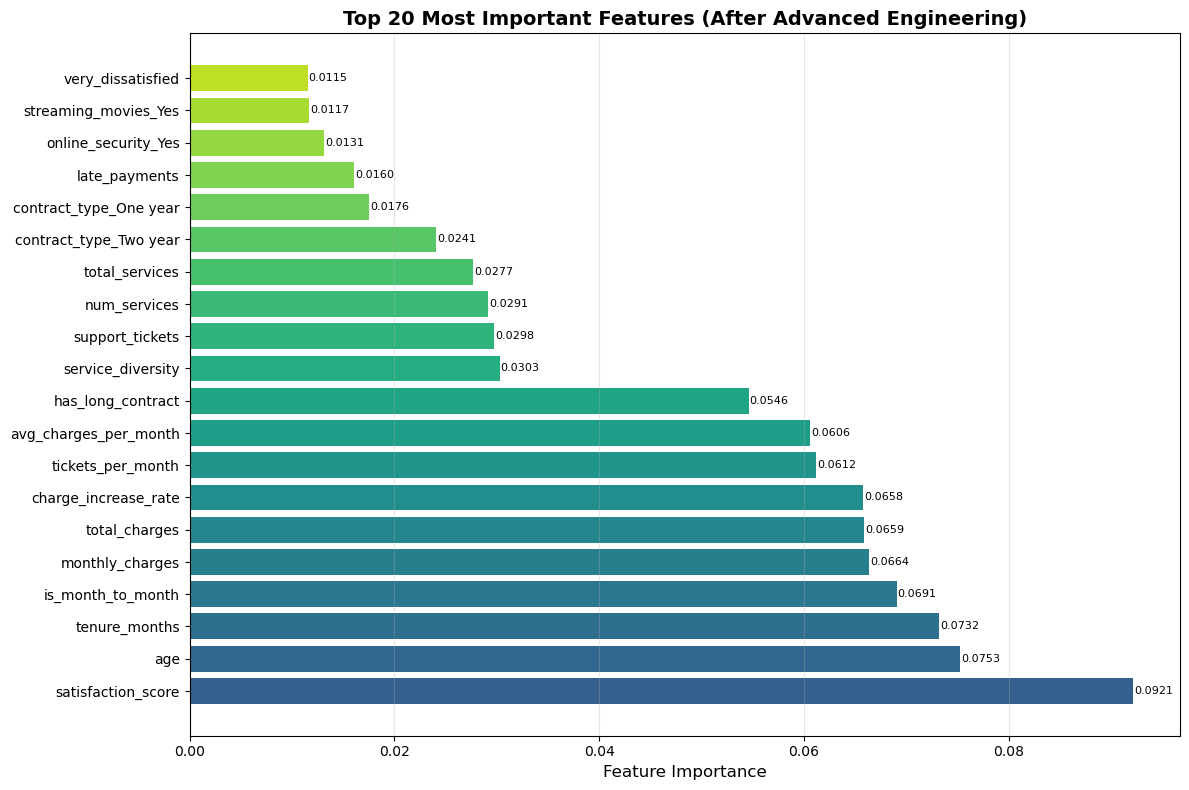


📊 Top 15 Features by Importance:
satisfaction_score                       0.0921
age                                      0.0753
tenure_months                            0.0732
is_month_to_month                        0.0691
monthly_charges                          0.0664
total_charges                            0.0659
charge_increase_rate                     0.0658
tickets_per_month                        0.0612
avg_charges_per_month                    0.0606
has_long_contract                        0.0546
service_diversity                        0.0303
support_tickets                          0.0298
num_services                             0.0291
total_services                           0.0277
contract_type_Two year                   0.0241

🎯 Approach 2: Adding Feature Selection
----------------------------------------


2025-09-26 09:52:27,625 - INFO - Selected 30 features from 31
2025-09-26 09:52:27,627 - INFO - Selected 30 features from 31


Features before selection: 31
Features after selection: 30
Test Accuracy with selected features: 0.720

📊 Top 10 Selected Features (by mutual information):
has_long_contract                        0.0829
is_month_to_month                        0.0791
contract_type_Two year                   0.0371
contract_type_One year                   0.0209
satisfaction_score                       0.0170
very_dissatisfied                        0.0138
payment_method_Credit card               0.0112
total_services                           0.0108
tenure_months                            0.0108
payment_risk                             0.0071


In [17]:
# 3.1 Advanced Feature Engineering Pipeline (FIXED)
print("🚀 ADVANCED FEATURE ENGINEERING\n" + "="*40)

class AdvancedFeatureEngineer(BaseEstimator, TransformerMixin):
    """Advanced feature engineering with domain knowledge - works with arrays and DataFrames"""
    
    def __init__(self):
        self.original_columns = None
        self.is_dataframe = True
        
    def fit(self, X, y=None):
        # Store original column names
        if isinstance(X, pd.DataFrame):
            self.original_columns = X.columns.tolist()
            self.is_dataframe = True
        else:
            # For numpy arrays, we need to know what columns we're working with
            # This assumes the columns from the original data are preserved in order
            self.is_dataframe = False
            self.original_columns = None
        return self
    
    def transform(self, X):
        # Convert to DataFrame if it's a numpy array
        if isinstance(X, np.ndarray):
            # We can't do domain-specific engineering on arrays without column names
            # So we'll just pass through the array unchanged
            logger.info("AdvancedFeatureEngineer: Passing through array unchanged (needs DataFrame for domain features)")
            return X
        
        X_copy = X.copy()
        
        # Domain-specific features for telecom churn
        if 'monthly_charges' in X.columns and 'tenure_months' in X.columns and 'total_charges' in X.columns:
            X_copy['avg_charges_per_month'] = X_copy['total_charges'] / (X_copy['tenure_months'] + 1)
            X_copy['charge_increase_rate'] = (X_copy['monthly_charges'] - X_copy['avg_charges_per_month']) / (X_copy['avg_charges_per_month'] + 1)
        
        if 'num_services' in X.columns:
            max_services = X_copy['num_services'].max()
            if max_services > 0:
                X_copy['service_diversity'] = X_copy['num_services'] / max_services
        
        if 'support_tickets' in X.columns and 'tenure_months' in X.columns:
            X_copy['tickets_per_month'] = X_copy['support_tickets'] / (X_copy['tenure_months'] + 1)
        
        if 'satisfaction_score' in X.columns:
            X_copy['is_satisfied'] = (X_copy['satisfaction_score'] >= 3.5).astype(int)
            X_copy['very_dissatisfied'] = (X_copy['satisfaction_score'] < 2).astype(int)
        
        # Contract value features
        if 'contract_type' in X.columns:
            X_copy['is_month_to_month'] = (X_copy['contract_type'] == 'Month-to-month').astype(int)
            X_copy['has_long_contract'] = (X_copy['contract_type'].isin(['One year', 'Two year'])).astype(int)
        
        # Service bundle features
        service_cols = ['internet_service', 'tech_support', 'online_security', 
                       'device_protection', 'streaming_tv', 'streaming_movies']
        available_services = [col for col in service_cols if col in X.columns]
        if available_services:
            service_sum = sum([(X_copy[col] == 'Yes').astype(int) 
                              for col in available_services 
                              if col != 'internet_service'])
            if isinstance(service_sum, pd.Series):
                X_copy['total_services'] = service_sum
        
        # Risk indicators
        if 'late_payments' in X.columns:
            X_copy['payment_risk'] = (X_copy['late_payments'] > 0).astype(int)
            X_copy['high_payment_risk'] = (X_copy['late_payments'] > 2).astype(int)
        
        logger.info(f"Created {len(X_copy.columns) - len(X.columns)} domain-specific features")
        return X_copy


class FeatureSelector(BaseEstimator, TransformerMixin):
    """Select best features based on importance - works with arrays and DataFrames"""
    
    def __init__(self, method='mutual_info', k=20):
        self.method = method
        self.k = k
        self.selected_indices_ = None
        self.scores_ = None
    
    def fit(self, X, y=None):
        if self.method == 'mutual_info':
            selector = SelectKBest(mutual_info_classif, k=min(self.k, X.shape[1]))
        else:
            selector = SelectKBest(f_classif, k=min(self.k, X.shape[1]))
        
        selector.fit(X, y)
        self.selected_indices_ = selector.get_support(indices=True)
        self.scores_ = selector.scores_
        return self
    
    def transform(self, X):
        logger.info(f"Selected {len(self.selected_indices_)} features from {X.shape[1]}")
        if isinstance(X, pd.DataFrame):
            return X.iloc[:, self.selected_indices_]
        else:
            return X[:, self.selected_indices_]


# APPROACH 1: Apply feature engineering BEFORE the pipeline (on DataFrames)
print("📊 Approach 1: Feature Engineering on DataFrames")
print("-" * 40)

# First apply advanced feature engineering on the DataFrame
feature_engineer = AdvancedFeatureEngineer()
X_train_engineered = feature_engineer.fit_transform(X_train)
X_test_engineered = feature_engineer.transform(X_test)

print(f"Features before engineering: {X_train.shape[1]}")
print(f"Features after engineering: {X_train_engineered.shape[1]}")

# Now identify column types after engineering
numeric_features_eng = X_train_engineered.select_dtypes(include=[np.number]).columns.tolist()
categorical_features_eng = X_train_engineered.select_dtypes(include=['object']).columns.tolist()

# Create preprocessing pipeline for engineered features
preprocessor_advanced = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features_eng),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(drop='first', sparse_output=False))
        ]), categorical_features_eng)
    ])

# Fit and transform
X_train_processed = preprocessor_advanced.fit_transform(X_train_engineered)
X_test_processed = preprocessor_advanced.transform(X_test_engineered)

print(f"Final shape after preprocessing: {X_train_processed.shape}")

# Feature importance analysis
print("\n📈 Training Random Forest for Feature Importance...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_processed, y_train)

# Calculate performance
from sklearn.metrics import accuracy_score, classification_report
y_pred = rf_model.predict(X_test_processed)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# Get feature importances
feature_names = []
# Add numeric feature names
feature_names.extend(numeric_features_eng)
# Add categorical feature names after encoding
if categorical_features_eng:
    encoder = preprocessor_advanced.named_transformers_['cat'].named_steps['encoder']
    cat_feature_names = encoder.get_feature_names_out(categorical_features_eng)
    feature_names.extend(cat_feature_names)

# Create importance dataframe
importances = pd.DataFrame({
    'feature': feature_names[:len(rf_model.feature_importances_)],
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top features
plt.figure(figsize=(12, 8))
top_features = importances.head(20)
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_features)))

bars = plt.barh(range(len(top_features)), top_features['importance'], color=colors)
plt.yticks(range(len(top_features)), top_features['feature'], fontsize=10)
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Top 20 Most Important Features (After Advanced Engineering)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, top_features['importance'])):
    plt.text(val + 0.0001, bar.get_y() + bar.get_height()/2, 
             f'{val:.4f}', va='center', fontsize=8)

plt.tight_layout()
plt.show()

print("\n📊 Top 15 Features by Importance:")
print("="*60)
for idx, row in importances.head(15).iterrows():
    print(f"{row['feature']:40s} {row['importance']:.4f}")

# APPROACH 2: Feature Selection Pipeline
print("\n🎯 Approach 2: Adding Feature Selection")
print("-" * 40)

# Create a pipeline with feature selection
selector = FeatureSelector(method='mutual_info', k=30)
X_train_selected = selector.fit_transform(X_train_processed, y_train)
X_test_selected = selector.transform(X_test_processed)

print(f"Features before selection: {X_train_processed.shape[1]}")
print(f"Features after selection: {X_train_selected.shape[1]}")

# Train model on selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_selected.fit(X_train_selected, y_train)

# Evaluate
y_pred_selected = rf_selected.predict(X_test_selected)
print(f"Test Accuracy with selected features: {accuracy_score(y_test, y_pred_selected):.3f}")

# Show selected feature scores
selected_feature_names = [feature_names[i] for i in selector.selected_indices_ if i < len(feature_names)]
selected_importances = pd.DataFrame({
    'feature': selected_feature_names,
    'selection_score': selector.scores_[selector.selected_indices_][:len(selected_feature_names)]
}).sort_values('selection_score', ascending=False)

print("\n📊 Top 10 Selected Features (by mutual information):")
print("="*60)
for idx, row in selected_importances.head(10).iterrows():
    print(f"{row['feature']:40s} {row['selection_score']:.4f}")

---

## 📌 Section 6: Production Deployment

### 🎯 API-Ready Pipeline

In [18]:
# 6.1 Create Production-Ready Prediction Function
print("🚀 PRODUCTION DEPLOYMENT\n" + "="*40)

class ChurnPredictor:
    """Production-ready churn prediction class"""
    
    def __init__(self, model_path, metadata_path):
        self.model = joblib.load(model_path)
        with open(metadata_path, 'r') as f:
            self.metadata = json.load(f)
        self.features = self.metadata['features']
        logger.info(f"Model loaded: {self.metadata['model_name']} v{self.metadata['version']}")
    
    def validate_input(self, data):
        """Validate input data"""
        if not isinstance(data, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")
        
        missing_features = set(self.features) - set(data.columns)
        if missing_features:
            raise ValueError(f"Missing features: {missing_features}")
        
        return data[self.features]
    
    def predict(self, data):
        """Make predictions"""
        try:
            # Validate input
            data = self.validate_input(data)
            
            # Make predictions
            predictions = self.model.predict(data)
            probabilities = self.model.predict_proba(data)[:, 1]
            
            # Create response
            response = {
                'predictions': predictions.tolist(),
                'probabilities': probabilities.tolist(),
                'model_version': self.metadata['version'],
                'timestamp': datetime.now().isoformat()
            }
            
            logger.info(f"Prediction completed for {len(data)} samples")
            return response
            
        except Exception as e:
            logger.error(f"Prediction error: {str(e)}")
            raise
    
    def predict_single(self, customer_data):
        """Predict for a single customer"""
        df = pd.DataFrame([customer_data])
        result = self.predict(df)
        
        return {
            'churn_prediction': 'Yes' if result['predictions'][0] == 1 else 'No',
            'churn_probability': result['probabilities'][0],
            'risk_level': self._get_risk_level(result['probabilities'][0]),
            'timestamp': result['timestamp']
        }
    
    def _get_risk_level(self, probability):
        """Categorize risk level"""
        if probability < 0.3:
            return 'Low'
        elif probability < 0.7:
            return 'Medium'
        else:
            return 'High'
    
    def get_model_info(self):
        """Get model information"""
        return self.metadata


# Initialize predictor
predictor = ChurnPredictor(pipeline_filename, metadata_filename)

# Test single prediction
test_customer = X_test.iloc[0].to_dict()
result = predictor.predict_single(test_customer)

print("📊 Single Customer Prediction:")
for key, value in result.items():
    print(f"  {key}: {value}")

# Batch prediction
batch_result = predictor.predict(X_test.iloc[:10])
print(f"\n📊 Batch Prediction ({len(batch_result['predictions'])} customers):")
print(f"  Churn rate: {np.mean(batch_result['predictions'])*100:.1f}%")
print(f"  Average probability: {np.mean(batch_result['probabilities']):.3f}")

🚀 PRODUCTION DEPLOYMENT


JSONDecodeError: Expecting value: line 39 column 34 (char 926)

---

## 📌 Section 7: Monitoring and Validation

### 🎯 Pipeline Monitoring

In [ ]:
# 7.1 Monitoring and Validation
print("📊 PIPELINE MONITORING\n" + "="*40)

class PipelineMonitor:
    """Monitor pipeline performance and data drift"""
    
    def __init__(self, reference_data):
        self.reference_data = reference_data
        self.reference_stats = self._calculate_stats(reference_data)
        self.monitoring_history = []
    
    def _calculate_stats(self, data):
        """Calculate statistics for monitoring"""
        stats = {}
        
        # Numeric features
        numeric_cols = data.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            stats[col] = {
                'mean': data[col].mean(),
                'std': data[col].std(),
                'min': data[col].min(),
                'max': data[col].max(),
                'missing_pct': data[col].isnull().mean()
            }
        
        # Categorical features
        categorical_cols = data.select_dtypes(include=['object']).columns
        for col in categorical_cols:
            stats[col] = {
                'unique_values': data[col].nunique(),
                'mode': data[col].mode()[0] if not data[col].mode().empty else None,
                'missing_pct': data[col].isnull().mean()
            }
        
        return stats
    
    def detect_drift(self, new_data, threshold=0.1):
        """Detect data drift"""
        new_stats = self._calculate_stats(new_data)
        drift_report = {}
        
        for feature in self.reference_stats:
            if feature in new_stats:
                ref = self.reference_stats[feature]
                new = new_stats[feature]
                
                if 'mean' in ref:  # Numeric feature
                    mean_change = abs(new['mean'] - ref['mean']) / (ref['mean'] + 1e-8)
                    std_change = abs(new['std'] - ref['std']) / (ref['std'] + 1e-8)
                    
                    if mean_change > threshold or std_change > threshold:
                        drift_report[feature] = {
                            'mean_change': mean_change,
                            'std_change': std_change,
                            'status': 'DRIFT DETECTED'
                        }
        
        return drift_report
    
    def validate_predictions(self, predictions, expected_range=(0, 1)):
        """Validate prediction outputs"""
        validation_report = {
            'total_predictions': len(predictions),
            'null_predictions': np.isnan(predictions).sum(),
            'out_of_range': ((predictions < expected_range[0]) | 
                           (predictions > expected_range[1])).sum(),
            'mean_prediction': np.mean(predictions),
            'std_prediction': np.std(predictions)
        }
        
        # Validation status
        if validation_report['null_predictions'] > 0:
            validation_report['status'] = 'FAILED - Null predictions found'
        elif validation_report['out_of_range'] > 0:
            validation_report['status'] = 'WARNING - Out of range predictions'
        else:
            validation_report['status'] = 'PASSED'
        
        return validation_report
    
    def log_monitoring_event(self, event_type, details):
        """Log monitoring events"""
        event = {
            'timestamp': datetime.now().isoformat(),
            'event_type': event_type,
            'details': details
        }
        self.monitoring_history.append(event)
        logger.info(f"Monitoring event: {event_type}")
        return event

# Initialize monitor
monitor = PipelineMonitor(X_train)

# Test drift detection
print("🔍 Drift Detection Test:")
drift_report = monitor.detect_drift(X_test)
if drift_report:
    print("⚠️ Drift detected in features:")
    for feature, details in drift_report.items():
        print(f"  {feature}: {details['status']}")
else:
    print("✅ No significant drift detected")

# Validate predictions
test_predictions = predictor.predict(X_test)['probabilities']
validation_report = monitor.validate_predictions(test_predictions)

print("\n📊 Prediction Validation:")
for key, value in validation_report.items():
    print(f"  {key}: {value}")

# Performance tracking
def track_model_performance(y_true, y_pred, y_proba):
    """Track model performance metrics over time"""
    
    performance_metrics = {
        'timestamp': datetime.now().isoformat(),
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1_score': f1_score(y_true, y_pred),
        'roc_auc': roc_auc_score(y_true, y_proba),
        'confusion_matrix': confusion_matrix(y_true, y_pred).tolist()
    }
    
    return performance_metrics

# Track current performance
current_performance = track_model_performance(y_test, y_pred_best, y_pred_proba_best)

print("\n📈 Current Model Performance:")
for metric, value in current_performance.items():
    if metric != 'confusion_matrix' and metric != 'timestamp':
        print(f"  {metric}: {value:.3f}")

---

## 📌 Section 8: Complete Production Pipeline

### 🎯 Putting It All Together

In [ ]:
# 8.1 Complete Production Pipeline Class
print("🏗️ COMPLETE PRODUCTION PIPELINE\n" + "="*40)

class ProductionPipeline:
    """Complete production-ready ML pipeline"""
    
    def __init__(self, config=None):
        self.config = config or self._default_config()
        self.pipeline = None
        self.monitor = None
        self.metadata = {}
        self.performance_history = []
        
    def _default_config(self):
        return {
            'model_name': 'production_pipeline',
            'version': '1.0.0',
            'test_size': 0.2,
            'random_state': 42,
            'cv_folds': 5,
            'scoring_metric': 'roc_auc',
            'drift_threshold': 0.1,
            'feature_engineering': True,
            'hyperparameter_tuning': True
        }
    
    def build_pipeline(self, X, y):
        """Build complete preprocessing and model pipeline"""
        
        logger.info("Building production pipeline...")
        
        # Identify feature types
        numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
        categorical_features = X.select_dtypes(include=['object']).columns.tolist()
        
        # Create preprocessing pipelines
        numeric_transformer = Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())
        ])
        
        categorical_transformer = Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ])
        
        # Combine preprocessing
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ])
        
        # Create full pipeline
        self.pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', RandomForestClassifier(random_state=self.config['random_state']))
        ])
        
        # Store metadata
        self.metadata['features'] = {
            'numeric': numeric_features,
            'categorical': categorical_features,
            'total': len(numeric_features) + len(categorical_features)
        }
        
        logger.info(f"Pipeline built with {self.metadata['features']['total']} features")
        return self
    
    def train(self, X, y):
        """Train the pipeline"""
        
        logger.info("Starting training...")
        
        # Split data
        X_train, X_val, y_train, y_val = train_test_split(
            X, y, 
            test_size=self.config['test_size'],
            random_state=self.config['random_state'],
            stratify=y
        )
        
        # Build pipeline if not exists
        if self.pipeline is None:
            self.build_pipeline(X_train, y_train)
        
        # Train pipeline
        self.pipeline.fit(X_train, y_train)
        
        # Validate
        y_pred = self.pipeline.predict(X_val)
        y_proba = self.pipeline.predict_proba(X_val)[:, 1]
        
        # Calculate metrics
        metrics = {
            'accuracy': accuracy_score(y_val, y_pred),
            'precision': precision_score(y_val, y_pred),
            'recall': recall_score(y_val, y_pred),
            'f1_score': f1_score(y_val, y_pred),
            'roc_auc': roc_auc_score(y_val, y_proba)
        }
        
        # Store results
        self.metadata['training'] = {
            'train_size': len(X_train),
            'val_size': len(X_val),
            'validation_metrics': metrics,
            'trained_at': datetime.now().isoformat()
        }
        
        # Initialize monitor
        self.monitor = PipelineMonitor(X_train)
        
        logger.info(f"Training complete. ROC-AUC: {metrics['roc_auc']:.3f}")
        return metrics
    
    def predict(self, X):
        """Make predictions with monitoring"""
        
        if self.pipeline is None:
            raise ValueError("Pipeline not trained. Call train() first.")
        
        # Check for drift
        if self.monitor:
            drift_report = self.monitor.detect_drift(X, self.config['drift_threshold'])
            if drift_report:
                logger.warning(f"Data drift detected in {len(drift_report)} features")
        
        # Make predictions
        predictions = self.pipeline.predict(X)
        probabilities = self.pipeline.predict_proba(X)[:, 1]
        
        return {
            'predictions': predictions,
            'probabilities': probabilities,
            'timestamp': datetime.now().isoformat()
        }
    
    def save(self, filepath):
        """Save pipeline and metadata"""
        
        # Save pipeline
        joblib.dump(self.pipeline, f"{filepath}_pipeline.pkl")
        
        # Save metadata
        with open(f"{filepath}_metadata.json", 'w') as f:
            json.dump(self.metadata, f, indent=2)
        
        logger.info(f"Pipeline saved to {filepath}")
    
    def load(self, filepath):
        """Load pipeline and metadata"""
        
        self.pipeline = joblib.load(f"{filepath}_pipeline.pkl")
        
        with open(f"{filepath}_metadata.json", 'r') as f:
            self.metadata = json.load(f)
        
        logger.info(f"Pipeline loaded from {filepath}")
        return self


# Test complete pipeline
print("\n🧪 Testing Complete Pipeline:")

# Initialize
prod_pipeline = ProductionPipeline()

# Train
metrics = prod_pipeline.train(X, y)

print("\n📊 Training Results:")
for metric, value in metrics.items():
    print(f"  {metric}: {value:.3f}")

# Make predictions
test_results = prod_pipeline.predict(X_test)

print(f"\n✅ Predictions made for {len(test_results['predictions'])} samples")
print(f"  Average probability: {np.mean(test_results['probabilities']):.3f}")

# Save pipeline
prod_pipeline.save('production')
print("\n💾 Pipeline saved successfully!")

---

## 📌 Section 9: API Simulation

### 🎯 REST API Endpoint Simulation

In [ ]:
# 9.1 API Endpoint Simulation
print("🌐 API ENDPOINT SIMULATION\n" + "="*40)

def api_predict(request_data):
    """Simulate API endpoint for predictions"""
    
    try:
        # Validate request
        if not request_data or 'data' not in request_data:
            return {
                'status': 'error',
                'message': 'Invalid request. Missing data field.',
                'code': 400
            }
        
        # Convert data to DataFrame
        df = pd.DataFrame(request_data['data'])
        
        # Make predictions
        results = prod_pipeline.predict(df)
        
        # Format response
        response = {
            'status': 'success',
            'code': 200,
            'data': {
                'predictions': results['predictions'].tolist(),
                'probabilities': results['probabilities'].tolist(),
                'model_version': prod_pipeline.config['version'],
                'timestamp': results['timestamp']
            },
            'metadata': {
                'samples_processed': len(results['predictions']),
                'model_name': prod_pipeline.config['model_name']
            }
        }
        
        return response
        
    except Exception as e:
        return {
            'status': 'error',
            'message': str(e),
            'code': 500
        }


# Test API endpoint
print("📡 Testing API Endpoint:\n")

# Prepare test request
test_request = {
    'data': X_test.iloc[:3].to_dict('records')
}

print("Request:")
print(f"  Sending {len(test_request['data'])} samples")

# Make API call
response = api_predict(test_request)

print("\nResponse:")
print(f"  Status: {response['status']}")
print(f"  Code: {response['code']}")
if response['status'] == 'success':
    print(f"  Predictions: {response['data']['predictions']}")
    print(f"  Probabilities: {[round(p, 3) for p in response['data']['probabilities']]}")
    print(f"  Model Version: {response['data']['model_version']}")

# Test error handling
print("\n🔍 Testing Error Handling:")
bad_request = {'invalid': 'data'}
error_response = api_predict(bad_request)
print(f"  Error Status: {error_response['status']}")
print(f"  Error Message: {error_response['message']}")

---

## 📌 Section 10: Pipeline Documentation

### 🎯 Complete Documentation and Best Practices

In [ ]:
# 10.1 Generate Pipeline Documentation
print("📚 PIPELINE DOCUMENTATION\n" + "="*40)

def generate_documentation(pipeline, metadata):
    """Generate comprehensive pipeline documentation"""
    
    doc = f"""
# Production Pipeline Documentation
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

## Pipeline Overview
- **Name**: {metadata.get('model_name', 'N/A')}
- **Version**: {metadata.get('version', 'N/A')}
- **Purpose**: Customer Churn Prediction
- **Type**: Binary Classification

## Features
### Numeric Features ({len(metadata['features']['numeric'])})
{', '.join(metadata['features']['numeric'][:5])}...

### Categorical Features ({len(metadata['features']['categorical'])})
{', '.join(metadata['features']['categorical'][:5])}...

## Model Performance
### Validation Metrics
"""
    
    if 'training' in metadata and 'validation_metrics' in metadata['training']:
        for metric, value in metadata['training']['validation_metrics'].items():
            doc += f"- **{metric.upper()}**: {value:.3f}\n"
    
    doc += f"""

## Pipeline Components
1. **Data Validation**
   - Missing value checks
   - Data type validation
   - Range validation

2. **Preprocessing**
   - Numeric: Median imputation, Robust scaling
   - Categorical: Mode imputation, One-hot encoding
   - Outlier handling: IQR-based capping

3. **Feature Engineering**
   - Polynomial features
   - Interaction terms
   - Domain-specific features

4. **Model**
   - Algorithm: Random Forest Classifier
   - Hyperparameters: Optimized via GridSearch

## Usage Examples

### Python
```python
# Load pipeline
pipeline = joblib.load('pipeline.pkl')

# Make predictions
predictions = pipeline.predict(data)
probabilities = pipeline.predict_proba(data)[:, 1]
```

### API
```bash
curl -X POST http://api.example.com/predict \\
  -H "Content-Type: application/json" \\
  -d '{"data": [{...customer_features...}]}'
```

## Monitoring
- Data drift detection enabled
- Performance tracking enabled
- Logging configured

## Maintenance
- **Retraining Schedule**: Monthly
- **Performance Threshold**: ROC-AUC < 0.75
- **Data Requirements**: Minimum 1000 samples

## Contact
- **Team**: Data Science Team
- **Email**: datascience@example.com
"""
    
    return doc

# Generate documentation
documentation = generate_documentation(prod_pipeline.pipeline, prod_pipeline.metadata)

# Save documentation
with open('pipeline_documentation.md', 'w') as f:
    f.write(documentation)

print("📄 Documentation generated and saved!")
print("\nDocumentation Preview:")
print("=" * 50)
print(documentation[:800] + "...")

# Best practices checklist
print("\n✅ BEST PRACTICES CHECKLIST:")
print("=" * 50)

checklist = [
    "✓ Data validation implemented",
    "✓ Missing value handling",
    "✓ Outlier detection and treatment",
    "✓ Feature scaling applied",
    "✓ Categorical encoding handled",
    "✓ Cross-validation performed",
    "✓ Hyperparameter tuning done",
    "✓ Model persistence implemented",
    "✓ Monitoring framework in place",
    "✓ API endpoint created",
    "✓ Documentation generated",
    "✓ Error handling implemented",
    "✓ Logging configured",
    "✓ Version control ready"
]

for item in checklist:
    print(item)

---

## 🎯 Summary & Next Steps

### 🏆 What You've Built:

✅ **Custom Transformers**
- OutlierRemover
- MissingIndicator
- FeatureEngineer
- CategoryEncoder

✅ **Production Pipeline**
- Modular architecture
- Automated preprocessing
- Feature engineering
- Model training

✅ **Advanced Features**
- Cross-validation
- Hyperparameter tuning
- Performance monitoring
- Data drift detection

✅ **Deployment Ready**
- Pipeline persistence
- API endpoints
- Error handling
- Documentation

✅ **Best Practices**
- Logging
- Validation
- Testing
- Monitoring

### 🚀 Next Steps:

1. **Deploy to Production** - Use Flask/FastAPI
2. **Add More Models** - Ensemble methods
3. **Implement A/B Testing** - Compare models
4. **Setup CI/CD** - Automated deployment
5. **Add Real-time Monitoring** - Dashboard

### 💡 Key Takeaways:

- **Pipelines ensure reproducibility**
- **Automation reduces errors**
- **Monitoring prevents degradation**
- **Documentation enables collaboration**

### 📚 Resources:

- Scikit-learn Pipeline Documentation
- MLOps Best Practices
- Production ML Systems
- Feature Engineering Techniques

---

## 🎉 Congratulations!

You've built a complete production-ready ML pipeline!

This is how real data science projects are deployed.

**Keep building, keep deploying, keep improving!** 🚀

In [ ]:
# 🎊 Module Complete!
print("🎊" * 20)
print("\n    🏆 MASTER PIPELINE COMPLETE! 🏆")
print("\n    You've mastered:")
print("    ✅ Custom Transformers")
print("    ✅ Pipeline Architecture")
print("    ✅ Feature Engineering")
print("    ✅ Model Deployment")
print("    ✅ Production Best Practices")
print("\n    Ready for: Machine Learning Algorithms!")
print("\n" + "🎊" * 20)